In [6]:
from __future__ import print_function
from keras import backend as K
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Flatten, Activation
from keras.optimizers import Adam
from keras.utils import np_utils

import matplotlib.pyplot as plt
import numpy as np

#define the ConvNet
class LeNet:
    @staticmethod #???
    def build(input_shape, classes):
        model = Sequential()
        #CONV => RELU => POOL
        model.add(Conv2D(20,kernel_size=5,padding="same",
                                input_shape=input_shape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
        #CONV => RELU => POOL
        model.add(Conv2D(50,kernel_size=5,padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
        #Flatten => RELU layers
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))
        #a softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))
        return model

# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam() # RMSprop gives higher accuracy
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION

NB_CLASSES = 10   # number of outputs = number of digits
IMG_ROWS, IMG_COLS = 28,28
INPUT_SHAPE = (1, IMG_ROWS, IMG_COLS)

# data: shuffled and split between train and test sets
#
(X_train, y_train), (X_test, y_test) = mnist.load_data()
K.set_image_dim_ordering("th") # wtf is this

#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
# RESHAPED = 784
# X_train = X_train.reshape(60000, RESHAPED)
# X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize 
X_train /= 255
X_test /= 255
# we need a 60K x [1 x 28 x 28] shape as input to the CONVNET
X_train = X_train[:, np.newaxis, :, :]
X_test = X_test[:, np.newaxis, :, :]
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)


#initialize the optimizer and model
model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])
history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 20, 28, 28)        520       
_________________________________________________________________
activation_4 (Activation)    (None, 20, 28, 28)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 20, 14, 14)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 50, 14, 14)        25050     
_________________________________________________________________
activation_5 (Activation)    (None, 50, 14, 14)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 50, 7, 7)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


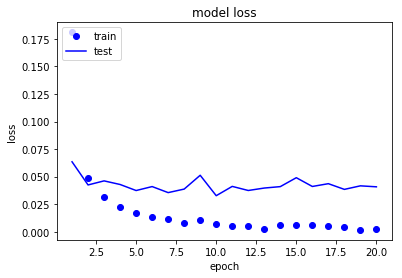

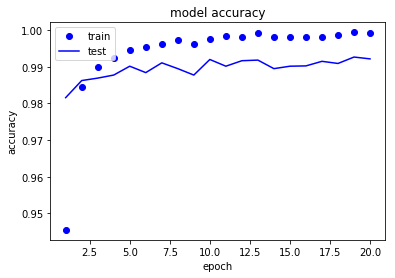

In [8]:
# list all data in history
print(history.history.keys())
# summarize history for loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for accuracy
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()